In [171]:
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
results_folder = '../MLIR-RL-2/results'
run_id = 0
alt_results_folder = ''
alt_run_id = 3

## Sampling

In [173]:
df = pd.read_csv(f'{results_folder}/{run_id}/sample.csv')
alt_df = pd.read_csv(f'{alt_results_folder}/{alt_run_id}/sample.csv') if alt_results_folder else None

df.head()

,speedup,cumulative_reward
0,0.982377,-5.025076
1,0.988039,-5.010566
2,1.044678,-4.966116
3,0.981981,-5.017845
4,25.421419,-2.192179


### Final Speedup

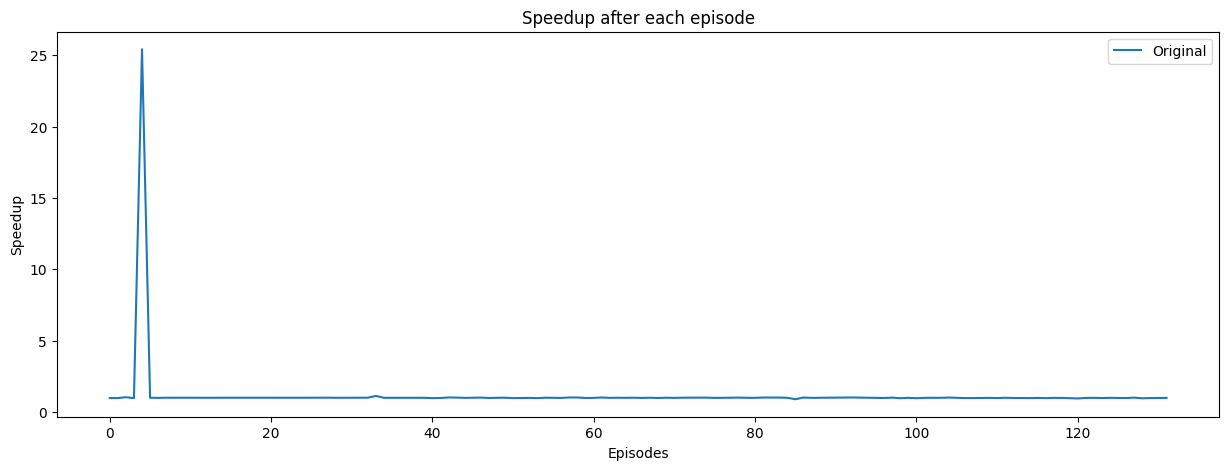

In [174]:
plt.figure(figsize=(15, 5))
plt.plot(df['speedup'], label='Original')
if alt_df is not None:
    plt.plot(alt_df['speedup'], label='Alternative')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Speedup')
plt.title('Speedup after each episode')
plt.show()

### Cumulative Reward

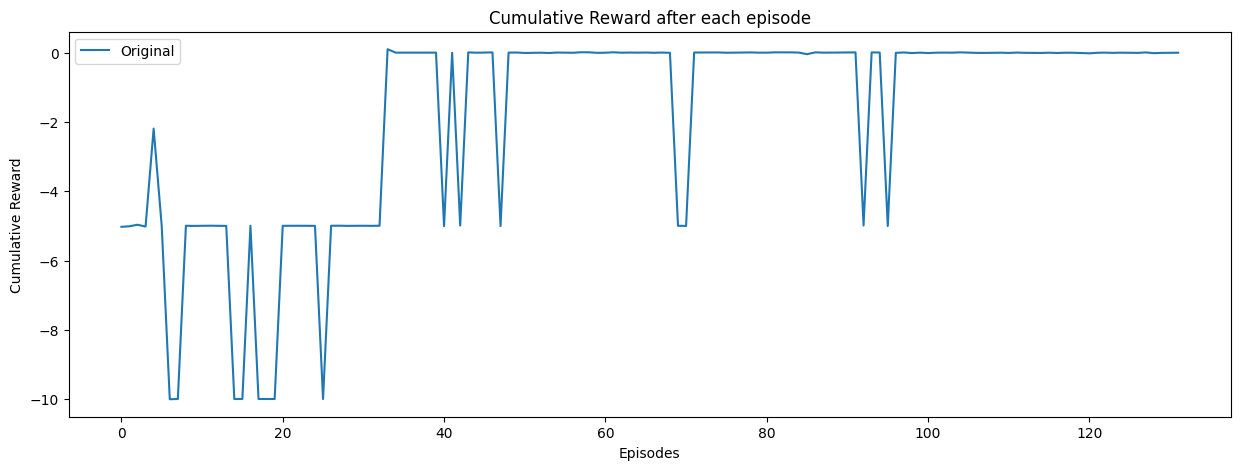

In [175]:
plt.figure(figsize=(15, 5))
plt.plot(df['cumulative_reward'], label='Original')
if alt_df is not None:
    plt.plot(alt_df['cumulative_reward'], label='Alternative')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward after each episode')
plt.show()

## Training

In [176]:
df = pd.read_csv(f'{results_folder}/{run_id}/train.csv')
alt_df = pd.read_csv(f'{alt_results_folder}/{alt_run_id}/train.csv') if alt_results_folder else None

df.head()

,policy_loss,value_loss,entropy,clip_factor
0,-5.308539e-08,2.822467,4.805393,1.068242
1,-6.183308e-02,2.789084,4.804312,0.459876
2,-8.531022e-02,2.688234,4.799214,0.540508
3,-9.882411e-02,2.537199,4.792762,0.723542
4,-2.980232e-08,1.624710,4.587318,1.284942


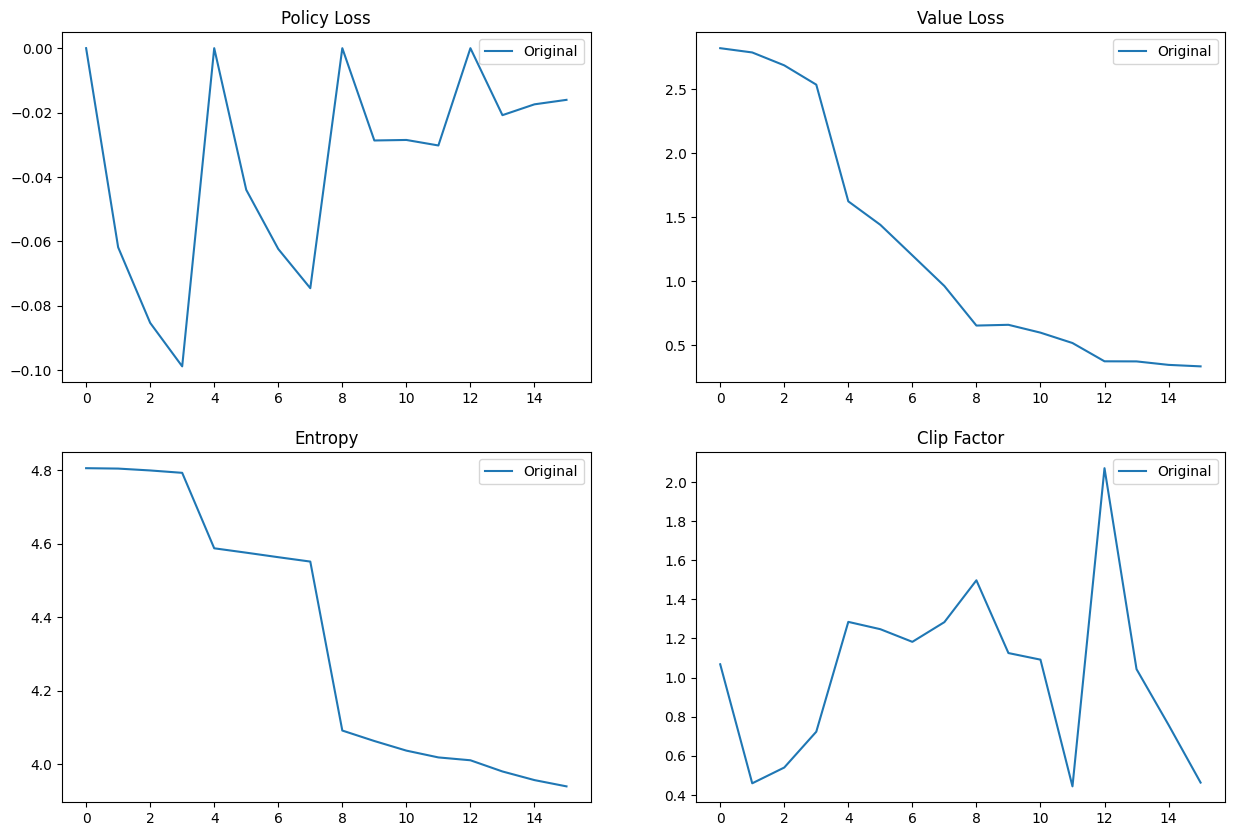

In [177]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].plot(df['policy_loss'], label='Original')
if alt_df is not None:
    axes[0, 0].plot(alt_df['policy_loss'], label='Alternative')
axes[0, 0].legend()
axes[0, 0].set_title('Policy Loss')
axes[0, 1].plot(df['value_loss'], label='Original')
if alt_df is not None:
    axes[0, 1].plot(alt_df['value_loss'], label='Alternative')
axes[0, 1].legend()
axes[0, 1].set_title('Value Loss')
axes[1, 0].plot(df['entropy'], label='Original')
if alt_df is not None:
    axes[1, 0].plot(alt_df['entropy'], label='Alternative')
axes[1, 0].legend()
axes[1, 0].set_title('Entropy')
axes[1, 1].plot(df['clip_factor'], label='Original')
if alt_df is not None:
    axes[1, 1].plot(alt_df['clip_factor'], label='Alternative')
axes[1, 1].legend()
axes[1, 1].set_title('Clip Factor')
plt.show()

## Evaluation

In [178]:
import os
evals_list = os.listdir(f'{results_folder}/{run_id}/eval')
alt_evals_list = os.listdir(f'{alt_results_folder}/{alt_run_id}/eval') if alt_results_folder else None

evals_list, alt_evals_list

(['AB.csv'], None)

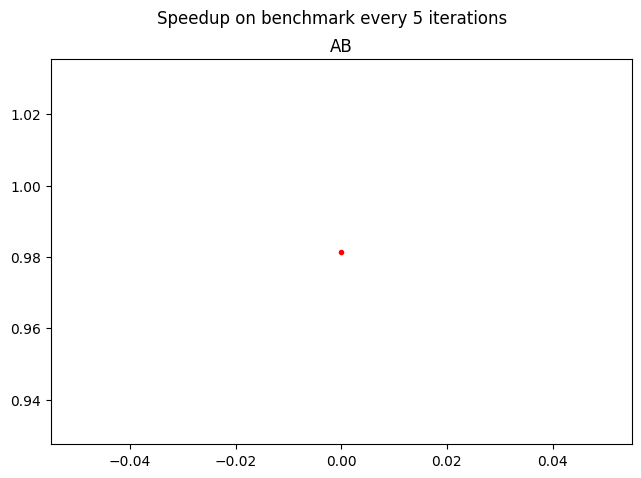

<Figure size 1500x500 with 0 Axes>

In [180]:
bench_file = evals_list[0]
alt_bench_file = alt_evals_list[-1] if alt_evals_list else None
df = pd.read_csv(f'{results_folder}/{run_id}/eval/{bench_file}')
alt_df = pd.read_csv(f'{alt_results_folder}/{alt_run_id}/eval/{alt_bench_file}') if alt_results_folder else None

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) if alt_df is not None else plt.subplots(1, 1, figsize=(7.5, 5))
plt.figure(figsize=(15, 5))
if alt_df is None:
    axes = [axes]
axes[0].plot(df['speedup'], marker='.', mfc='r', mec='r')
axes[0].set_title(bench_file.replace('.csv', ''))
if alt_df is not None:
    axes[1].plot(alt_df['speedup'], marker='.', mfc='r', mec='r')
    axes[1].set_title(f"{alt_bench_file.replace('.csv', '')} (alt)")
fig.suptitle('Speedup on benchmark every 5 iterations')
plt.show()